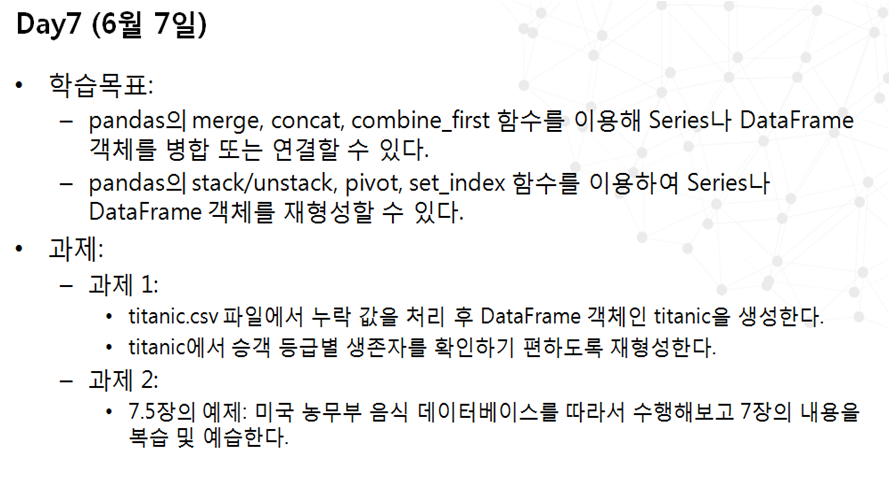

In [37]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
def NaNCheck(x):
    return (x.fillna(x.mean()))

In [5]:
df['Age']=NaNCheck(df['Age'])

In [6]:
df2=df.drop(columns=['Cabin','SibSp','Parch','Ticket','Fare','Name','PassengerId','Embarked'])

In [7]:
df2['Age']=df2['Age'].astype(int)

In [8]:
df2.head(10)

,Survived,Pclass,Sex,Age
0,0,3,male,22
1,1,1,female,38
2,1,3,female,26
3,1,1,female,35
4,0,3,male,35
5,0,3,male,29
6,0,1,male,54
7,0,3,male,2
8,1,3,female,27
9,1,2,female,14


승객 등급별 생존자

In [9]:
titanic=df2.set_index(['Pclass','Survived'])

In [10]:
titanic=df2.set_index(['Pclass','Survived','Sex'])

In [11]:
titanic.columns=['count']

In [12]:
titanic.head(20)

count
Pclass Survived Sex          
3      0        male       22
1      1        female     38
3      1        female     26
1      1        female     35
3      0        male       35
                male       29
1      0        male       54
3      0        male        2
       1        female     27
2      1        female     14
3      1        female      4
1      1        female     58
3      0        male       20
                male       39
                female     14
2      1        female     55
3      0        male        2
2      1        male       29
3      0        female     31
       1        female     29

In [19]:
titanic2=titanic.groupby(level=[0,1]).count()

In [20]:
titanic2

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

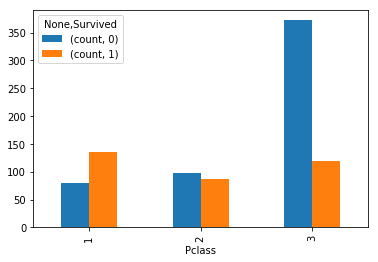

In [21]:
titanic2.unstack().plot(kind='bar')

승객 등급별과 성별로 생존자 확인

In [22]:
titanic3=titanic.groupby(level=[0,1,2]).count()

In [23]:
titanic3

count
Pclass Survived Sex          
1      0        female      3
                male       77
       1        female     91
                male       45
2      0        female      6
                male       91
       1        female     70
                male       17
3      0        female     72
                male      300
       1        female     72
                male       47

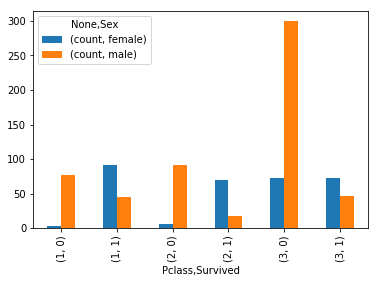

In [24]:
titanic3.unstack().plot(kind='bar')

In [ ]:
titanic2.columns=['count']

과제2

In [3]:
import json

In [4]:
db = json.load(open('ch07/foods-2011-10-03.json'))

In [5]:
len(db)

6636

In [6]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [7]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [9]:
nutrients=DataFrame(db[0]['nutrients'])

NameError: name 'DataFrame' is not defined

In [35]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [17]:
info_keys=['description','group','id','manufacturer']

In [18]:
info=DataFrame(db,columns=info_keys)

In [38]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [39]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [40]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [1]:
nutrients=[]

In [11]:
for rec in db:
    fnuts=DataFrame(rec['nutrients'])
    fnuts['id']=rec['id']
    nutrients.append(fnuts)

nutrients=pd.concat(nutrients, ignore_index=True)

In [44]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [12]:
nutrients.duplicated().sum()

14179

In [13]:
nutrients=nutrients.drop_duplicates()

In [14]:
col_mapping={'description':'food','group':'fgroup'}

In [19]:
info=info.rename(columns=col_mapping,copy=False)

In [20]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [21]:
col_mapping={'description':'nutrient','group':'nutgroup'}

In [22]:
nutrients=nutrients.rename(columns=col_mapping,copy=False)

In [23]:
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [24]:
ndata=pd.merge(nutrients,info,on='id',how='outer')

In [25]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [28]:
ndata.ix[30000]

C:\Users\edu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [31]:
result=ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

In [33]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

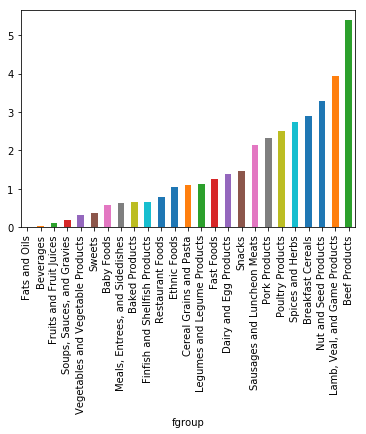

In [39]:
result['Zinc, Zn'].sort_values().plot(kind='bar')